
<center><h1>Subramanyam_Shruti_HW1</h1></center>
<center><h3>Name: Shruti Subramanyam</h3></center>
<center><h3>Github Username: Shruti-Subramanyam</h3></center>
<br>

## Vertebral Column Data Set
This Biomedical data set was built by Dr. Henrique da Mota during a medical residence period in Lyon, France. Each patient in the data set is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis. 

The following convention is used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and Abnormal (AB). In this exercise, we only focus on a binary classification task NO=0 and AB=1.

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
from sklearn.metrics import f1_score

In [105]:
"""
    (a) Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column.

"""
# Dataset have been loaded to folder
c = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius","grade_ of_spondylolisthesis","class"]
df = pd.read_table("../data/vertebral_column_data/column_2C.dat",sep=" ",header=None,names=c)

In [106]:
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_ of_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [107]:
df['class'].unique()

array(['AB', 'NO'], dtype=object)

In [108]:
df = df.replace({"class": {"AB":1,"NO":0}})

In [109]:
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_ of_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


Text(0.5, 1, 'Independent variables Scatterplot (vertebral column_2C dataset)')

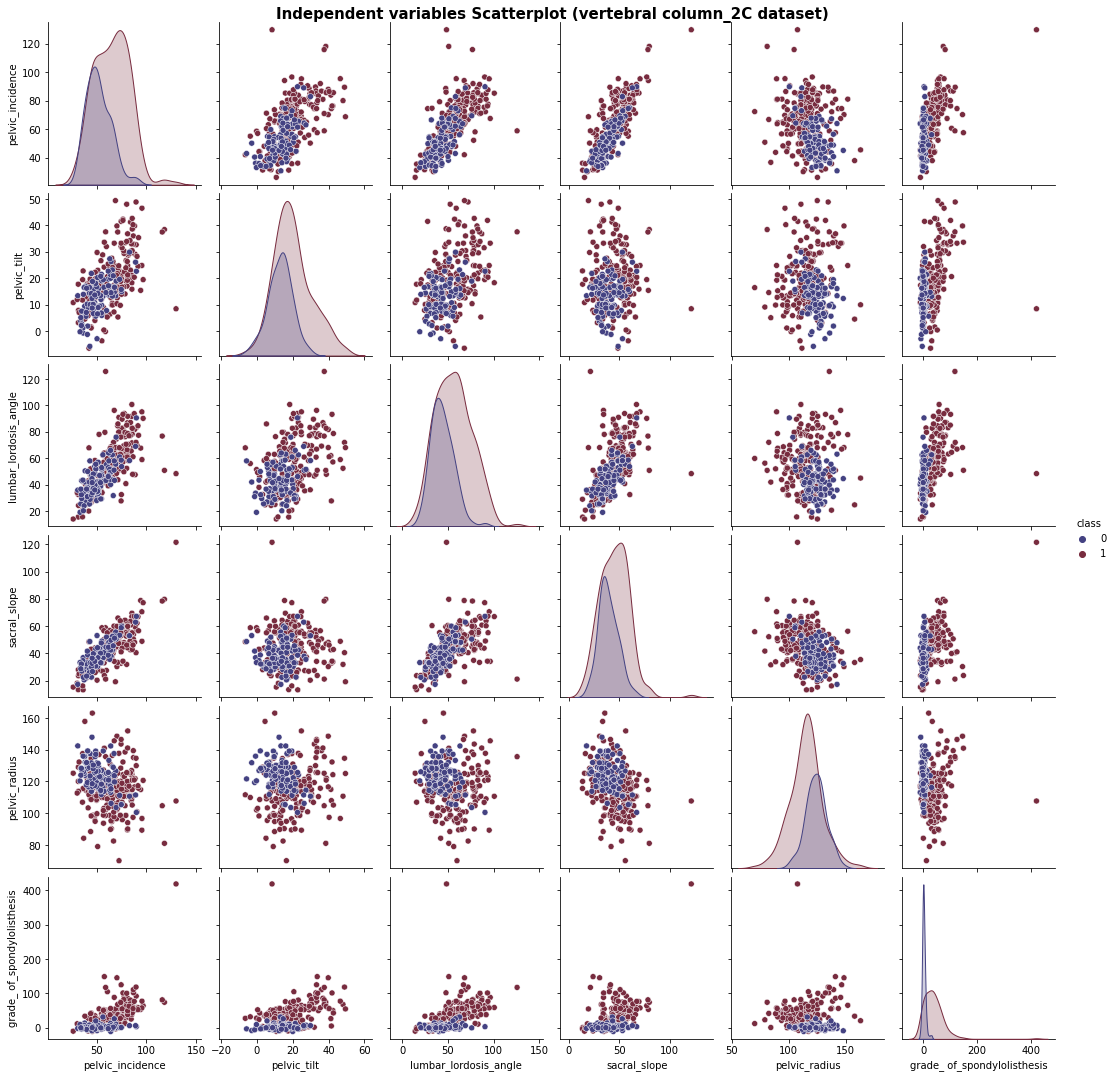

In [110]:
"""
    (b) Pre-Processing and Exploratory data analysis:
    i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.
"""

df_pp = sns.pairplot(df,hue='class',kind='scatter',palette = "icefire")
df_pp.fig.suptitle('Independent variables Scatterplot (vertebral column_2C dataset)', y=1,fontsize=15,weight='bold')

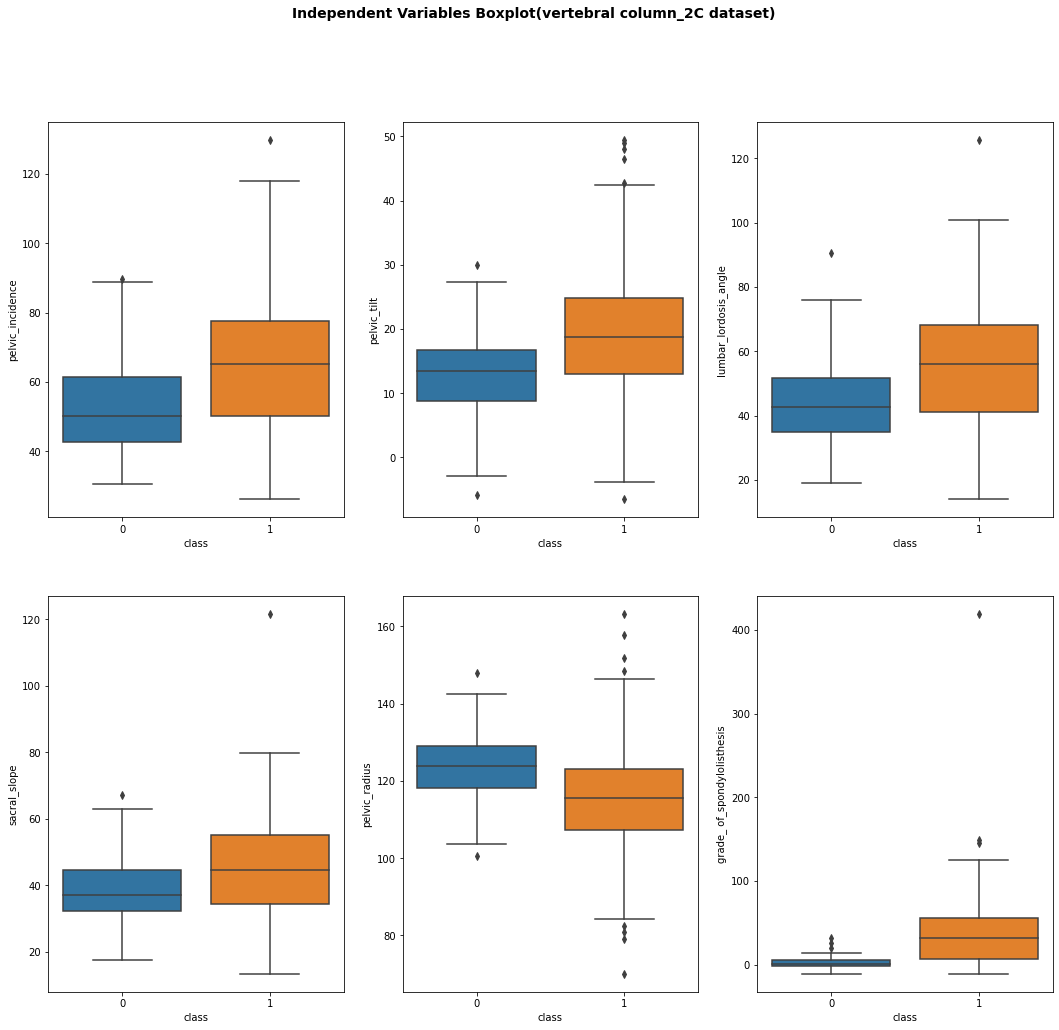

In [111]:
"""
    (b) Pre-Processing and Exploratory data analysis:
    ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).
"""

fig = plt.figure(figsize=(18,16))
plt.suptitle('Independent Variables Boxplot(vertebral column_2C dataset)', fontsize=14, weight='bold')
n = 1
for i in df.columns[:-1]:
    plt.subplot(2, 3, n)
    sns.boxplot(x='class', y=i, data=df, orient='v')
    n+=1
plt.show()

In [112]:
len(df['class'])

310

In [113]:
"""
    (b) Pre-Processing and Exploratory data analysis:
    iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set 
        and the rest of the data as the test set.

"""

#Training Data
df_train_c0 = df[df['class'] == 0][:70]
df_train_c1 = df[df['class'] == 1][:140]
df_train = pd.concat([df_train_c0,df_train_c1])
print("dftrain:",df_train)

#Testing Data
df_sample = df.copy()
df_test = df_sample.drop(df_train.index)
print("dftest:",df_test)

dftrain:      pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
210             38.51        16.96                  35.11         21.54   
211             54.92        18.97                  51.60         35.95   
212             44.36         8.95                  46.90         35.42   
213             48.32        17.45                  48.00         30.87   
214             45.70        10.66                  42.58         35.04   
..                ...          ...                    ...           ...   
135             77.12        30.35                  77.48         46.77   
136             88.02        39.84                  81.77         48.18   
137             83.40        34.31                  78.42         49.09   
138             72.05        24.70                  79.87         47.35   
139             85.10        21.07                  91.73         64.03   

     pelvic_radius  grade_ of_spondylolisthesis  class  
210         127.63               

In [114]:
df_test.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_ of_spondylolisthesis,class
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,65.23000,18.207500,58.530100,47.022600,113.522600,34.986200,0.700000
std,17.47132,11.660512,20.171759,12.470495,15.753521,30.899503,0.460566
min,33.04000,-3.760000,19.070000,19.290000,70.080000,-8.940000,0.000000
25%,51.01750,10.002500,43.175000,36.635000,103.387500,6.032500,0.000000
50%,64.44500,15.315000,58.480000,45.950000,115.760000,31.775000,1.000000
75%,78.61250,24.082500,72.020000,55.455000,125.055000,53.137500,1.000000
max,118.14000,49.430000,125.740000,79.700000,157.850000,124.980000,1.000000


In [115]:
df_train.index

Int64Index([210, 211, 212, 213, 214, 215, 216, 217, 218, 219,
            ...
            130, 131, 132, 133, 134, 135, 136, 137, 138, 139],
           dtype='int64', length=210)

In [116]:
df_test.index

Int64Index([140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
            153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
            166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
            179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
            192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
            205, 206, 207, 208, 209, 280, 281, 282, 283, 284, 285, 286, 287,
            288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300,
            301, 302, 303, 304, 305, 306, 307, 308, 309],
           dtype='int64')

In [117]:
print("Length of Entire dataset:",len(df))
print("Length of Train datset:",len(df_train))
print("Length of Test datset:",len(df_test))

Length of Entire dataset: 310
Length of Train datset: 210
Length of Test datset: 100


In [118]:
"""
    (c) Classification using KNN on Vertebral Column Data Set
    i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).
"""

X_train = df_train.iloc[:, :-1].values 
y_train = df_train.iloc[:, -1].values 

X_test = df_test.iloc[:, :-1].values 
y_test = df_test.iloc[:, -1].values 

print('Shape of x_train: ',X_train.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of x_test: ',X_test.shape)
print('Shade of y_test: ',y_test.shape)

KNN_classifier = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

KNN_classifier.fit(X_train, y_train)

y_pred = KNN_classifier.predict(X_test)

train_acc = metrics.accuracy_score(y_train, KNN_classifier.predict(X_train))
print('Training Accuracy: {:.2f} '.format(train_acc))

test_accuracy = metrics.accuracy_score(y_test, y_pred)
print('Testing Accuracy: {:.2f} '.format(test_accuracy))

Shape of x_train:  (210, 6)
Shape of y_train:  (210,)
Shape of x_test:  (100, 6)
Shade of y_test:  (100,)
Training Accuracy: 0.85 
Testing Accuracy: 0.90 


In [119]:
"""
    (c) Classification using KNN on Vertebral Column Data Set
    ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. 
        Plot train and test errors in terms of k for k ∈ {, 205, . . . , 7, 4, 1, } (in reverse order). 
        You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? 
        Calculate the confusion matrix, true positive rate, true negative rate, precision,and F1-score when k = k∗.2
"""

trainErr = []
testErr = []
kValue = []

for k in range(208,0,-3):
    kValue.append(k)
    KNN_classifier = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    KNN_classifier.fit(X_train, y_train)
    y_pred = KNN_classifier.predict(X_test)
    train_acc = metrics.accuracy_score(y_train, KNN_classifier.predict(X_train))
    test_acc = metrics.accuracy_score(y_test, y_pred)
    trainErr.append(1-train_acc)
    testErr.append(1-test_acc)
    
print('k value for max test_acc / min test_err is: {}'.format(kValue[np.argmin(testErr)]))

k value for max test_acc / min test_err is: 4


Text(0, 0.5, 'Train Error')

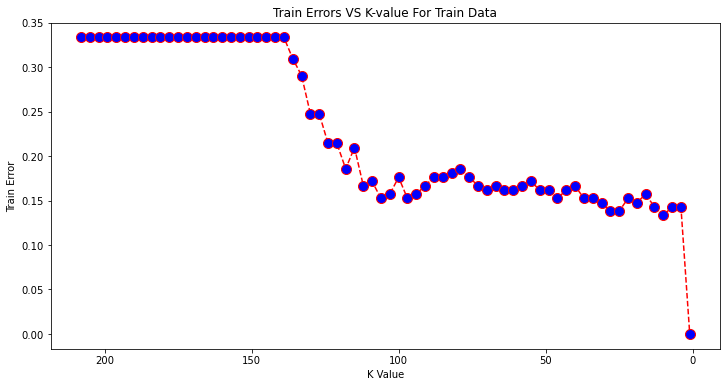

In [120]:
plt.figure(figsize=(12, 6))
plt.plot(range(208, 0, -3), trainErr, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.gca().invert_xaxis()
plt.title('Train Errors VS K-value For Train Data')
plt.xlabel('K Value')
plt.ylabel('Train Error')

Text(0, 0.5, 'Test Error')

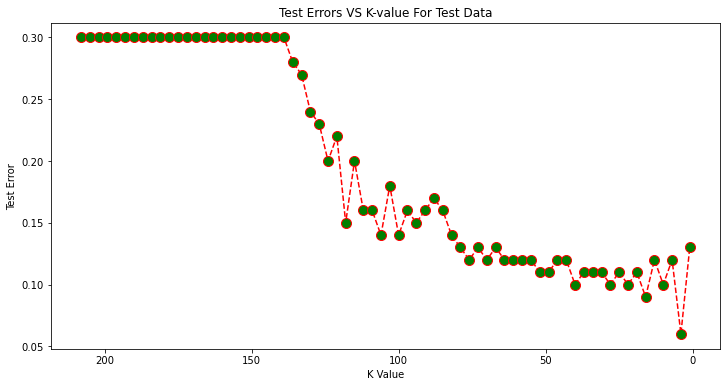

In [121]:
plt.figure(figsize=(12, 6))
plt.plot(range(208, 0, -3), testErr, color='red', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.gca().invert_xaxis()
plt.title('Test Errors VS K-value For Test Data')
plt.xlabel('K Value')
plt.ylabel('Test Error')

[[25  5]
 [ 1 69]]
Optimal K Value is 4

True Positive Rate= 0.9857142857142858
True Negative rate= 0.8333333333333334
Precision= 0.93 
F1-score= 0.96 

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



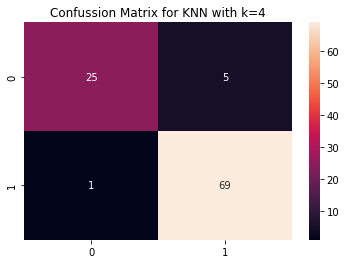

In [122]:
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)  

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot = True, fmt = 'g')
plt.title("Confussion Matrix for KNN with k=4", fontsize = 12)
class_report = classification_report(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

tpr = tp/(tp+fn) 
tnr = tn/(tn+fp) 
precision = tp/(tp+fp) 
f1score = f1_score(y_test, y_pred)
print(conf_matrix)
print("\033[1m" +"Optimal K Value is {}".format(kValue[np.argmin(testErr)]) + "\033[0m\n")
print('True Positive Rate= {}'.format(tpr))
print('True Negative rate= {}'.format(tnr))
print('Precision= {:.2f} '.format(precision))
print('F1-score= {:.2f} '.format(f1score))
print('\nClassification Report:')
print(class_report)


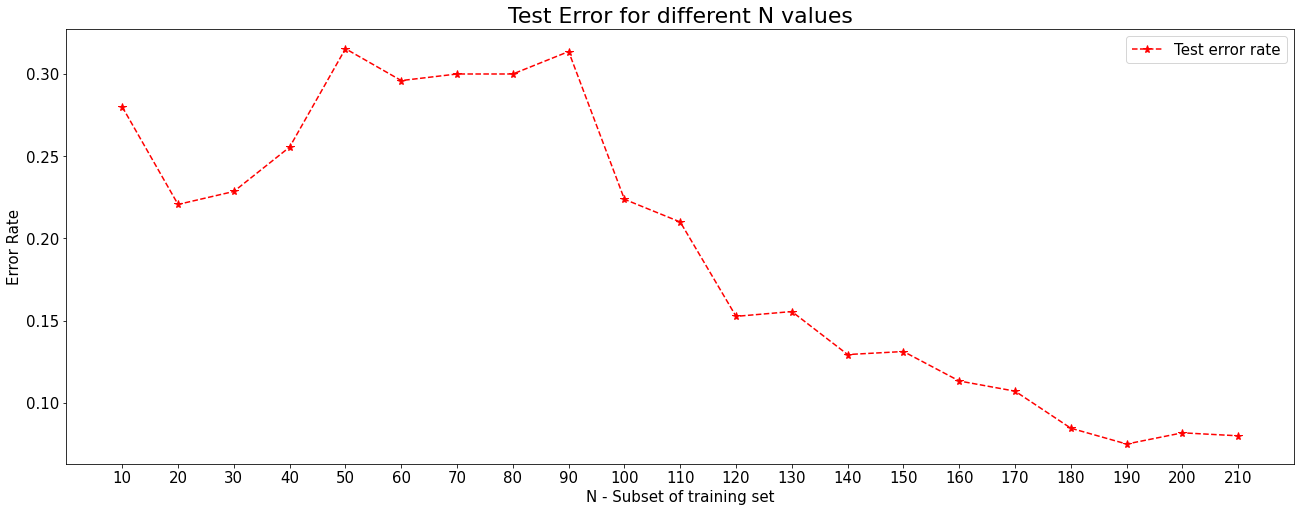

In [123]:
"""
    (c) Classification using KNN on Vertebral Column Data Set
    iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. 
        Plot the best test error rate, 3 which is obtained by some value of k, against the size of training set, 
        when the size of training set is N ∈ {10, 20, 30, . . . , 210}. 4 Note: for each N, select your training set 
        by choosing the first bN/3c rows of Class 0 and the first N − bN/3c rows of Class 1 in the training set you 
        created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. 
        For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}. 
        This plot is called a Learning Curve. Let us further explore some variants of KNN.
"""

kValue_new = []
NValue = []
err_new = []

for N in range(10,211,10):
    NValue.append(N)
    
    df_train_c0_new = df_train_c0.iloc[:round(N/3)]
    df_train_c1_new = df_train_c1.iloc[:(N-round(N/3))]
    
    df_sample2 = df.copy()
    df_train_new = pd.concat([df_train_c0_new,df_train_c1_new])
    df_test_new = df_sample2.drop(df_train_new.index)
    
    X_train_new = df_train_new.iloc[:, :-1].values 
    y_train_new = df_train_new.iloc[:, -1].values 
   
    X_test_new = df_test_new.iloc[:, :-1].values 
    y_test_new = df_test_new.iloc[:, -1].values 
    
    kValue_inloop = []
    testErr_inloop = []
    
    for k in range(1,197,5):
        if k <= N:
            kValue_inloop.append(k)
            
            KNN_classifier_new = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
            KNN_classifier_new.fit(X_train_new, y_train_new)
            y_pred_new = KNN_classifier_new.predict(X_test_new)
            
            test_accuracy_new = metrics.accuracy_score(y_test_new, y_pred_new)
            testErr_inloop.append(1-test_accuracy_new)
            
    err_new.append(min(testErr_inloop))
    kValue_new.append(kValue_inloop[np.argmin(testErr_inloop)])
    

plt.figure(figsize=(22, 8))
plt.plot(NValue, err_new, 'r*',linestyle = '--', markersize = 8)
plt.title('Test Error for different N values', fontsize=22)
plt.xticks(np.arange(10, 211, step = 10), fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('N - Subset of training set', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)
plt.legend(['Test error rate'],fontsize = 15)
plt.show()

In [124]:
"""
    (d) Replace the Euclidean metric with the following metrics5 and test them. Summarize the test errors 
        (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.
        i. Minkowski Distance:
            A. which becomes Manhattan Distance with p = 1.
"""

kValue_mdp = []
trainErr_mdp = []
testErr_mdp = []

for k in range(1,197,5):
    kValue_mdp.append(k)
    
    KNN_classifier_mdp = KNeighborsClassifier(n_neighbors=k,p=1,metric='minkowski')
    KNN_classifier_mdp.fit(X_train, y_train)
    y_pred_mdp = KNN_classifier_mdp.predict(X_test)
    
    traina_mdp = metrics.accuracy_score(y_train, KNN_classifier_mdp.predict(X_train))
    testa_mdp = metrics.accuracy_score(y_test, y_pred_mdp)
    
    trainErr_mdp.append(1-traina_mdp)
    testErr_mdp.append(1-testa_mdp)
    
print("\033[1m" +"Minkowski Distance (Manhattan Distance with p = 1)" + "\033[0m\n")
print('Minunum Train Error = {:.2f}'.format(min(trainErr_mdp)))
print('Minimum Test Error = {:.2f}'.format(min(testErr_mdp)))

print('Optimum K value = {}'.format(kValue_mdp[np.argmin(testErr_mdp)]))

Minkowski Distance (Manhattan Distance with p = 1)

Minunum Train Error = 0.00
Minimum Test Error = 0.11
Optimum K value = 6


In [125]:
"""
    (d) Replace the Euclidean metric with the following metrics5 and test them. Summarize the test errors 
        (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.
        i. Minkowski Distance:
            B. with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k∗ you found for the Manhattan 
            distance in 1(d)iA. What is the best log10(p)?
"""

k_mdp = kValue_mdp[np.argmin(testErr_mdp)]

trainErr_log = []
testErr_log = []
pValue_log = []

for p in [10**(0.1*i) for i in range(1,11)]:
    pValue_log.append(p)
    
    KNN_classifier_log = KNeighborsClassifier(n_neighbors=k_mdp,p=p,metric='minkowski')
    KNN_classifier_log.fit(X_train, y_train)
    y_pred_log = KNN_classifier_log.predict(X_test)
    
    traina_log = metrics.accuracy_score(y_train, KNN_classifier_log.predict(X_train))
    testa_log = metrics.accuracy_score(y_test, y_pred_log)
    trainErr_log.append(1-traina_log)
    testErr_log.append(1-testa_log)

print("\033[1m" +"Minkowski Distance (with different log10(p) values)" + "\033[0m\n")
print('Minunum Train Error = {:.2f}'.format(min(trainErr_log)))
print('Minunum Test Error = {:.2f}'.format(min(testErr_log)))
print('For optimal p = {:.2f} [where k = {}]'.format(pValue_log[np.argmin(testErr_log)],k_mdp))
print('Best log10(p) = {:.2f}'.format(np.log10(pValue_log[np.argmin(testErr_log)])))

Minkowski Distance (with different log10(p) values)

Minunum Train Error = 0.13
Minunum Test Error = 0.06
For optimal p = 3.98 [where k = 6]
Best log10(p) = 0.60


In [126]:
pValue_log

[1.2589254117941673,
 1.5848931924611136,
 1.9952623149688797,
 2.51188643150958,
 3.1622776601683795,
 3.981071705534973,
 5.011872336272724,
 6.309573444801933,
 7.943282347242816,
 10.0]

In [127]:
"""
    (d) Replace the Euclidean metric with the following metrics5 and test them. Summarize the test errors 
        (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.
        i. Minkowski Distance:
            C. which becomes Chebyshev Distance with p → ∞
"""

kValue_cb = []
trainErr_cb = []
testErr_cb = []

for k in range(1,197,5):
    kValue_cb.append(k)
    
    KNN_classifier_cb = KNeighborsClassifier(n_neighbors=k,p=float('inf'),metric='minkowski')
    KNN_classifier_cb.fit(X_train, y_train)
    y_pred_cb = KNN_classifier_cb.predict(X_test)
    
    traina_cb = metrics.accuracy_score(y_train, KNN_classifier_cb.predict(X_train))
    testa_cb = metrics.accuracy_score(y_test, y_pred_cb)
    trainErr_cb.append(1-traina_cb)
    testErr_cb.append(1-testa_cb)
    
print("\033[1m" +"Minkowski Distance (Chebyshev Distance with p → ∞)" + "\033[0m\n")
print('Minunum Train Error = {:.2f}'.format(min(trainErr_cb)))
print('Minunum Test Error = {:.2f}'.format(min(testErr_cb)))
print('Optimal k value = {}'.format(kValue_cb[testErr_cb.index(min(testErr_cb))]))

Minkowski Distance (Chebyshev Distance with p → ∞)

Minunum Train Error = 0.00
Minunum Test Error = 0.08
Optimal k value = 16


In [128]:
"""
    (d) Replace the Euclidean metric with the following metrics5 and test them. Summarize the test errors 
        (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.
        ii. Mahalanobis Distance.
"""

kValue_mdb = []
trainErr_mdb = []
testErr_mdb = []

for k in range(1,197,5):
    kValue_mdb.append(k)
    
    KNN_classifier_mdb = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI':np.linalg.inv(np.cov(X_train,rowvar=False))})
    KNN_classifier_mdb.fit(X_train, y_train)
    y_pred_mdb = KNN_classifier_mdb.predict(X_test)
    
    traina_mdb = metrics.accuracy_score(y_train, KNN_classifier_mdb.predict(X_train))
    testa_mdb = metrics.accuracy_score(y_test, y_pred_mdb)
    trainErr_mdb.append(1-traina_mdb)
    testErr_mdb.append(1-testa_mdb)

print("\033[1m" +"Mahalanobis Distance" + "\033[0m\n")
print('Minunum Train Error = {:.2f}'.format(min(trainErr_mdb)))
print('Minunum Test Error = {:.2f}'.format(min(testErr_mdb)))
print('Optimal k value = {}'.format(kValue_mdb[np.argmin(testErr_mdb)]))

Mahalanobis Distance

Minunum Train Error = 0.00
Minunum Test Error = 0.17
Optimal k value = 1


In [129]:
Metric_table = ['Manhattan', 'Minkowski with log10(p)', 'Chebyshev', 'Mahalanobis']
k_table = [kValue_mdp[np.argmin(testErr_mdp)],k_mdp,kValue_cb[np.argmin(testErr_cb)],kValue_mdb[np.argmin(testErr_mdb)]]
p_table = [1,pValue_log[np.argmin(testErr_log)],float('inf'),'NA']
test_error_table = [min(testErr_mdp),min(testErr_log),min(testErr_cb),min(testErr_mdb)]

table = pd.DataFrame(columns = ['Metric', 'k', 'p','Test Error'])
table['Metric'] = Metric_table
table['k'] = k_table
table['p'] = p_table
table['Test Error'] = test_error_table
table

,Metric,k,p,Test Error
0,Manhattan,6,1,0.11
1,Minkowski with log10(p),6,3.981072,0.06
2,Chebyshev,16,inf,0.08
3,Mahalanobis,1,NA,0.17


In [130]:
"""
    (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point 
        in voting is inversely proportional to its distance from the query/test data point. In this case, 
        closer neighbors of a query point will have a greater influence than neighbors which are further away. 
        Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test
        errors when k ∈ {1, 6, 11, 16, . . . , 196}.
"""

# Weighted Voting with Euclidean
kValue_weu = []
trainErr_weu = []
testErr_weu = []

for k in range(1,197,5):
    kValue_weu.append(k)
    
    KNN_classifier_weu = KNeighborsClassifier(n_neighbors=k,metric='euclidean',weights='distance')
    KNN_classifier_weu.fit(X_train, y_train)
    y_pred_weu = KNN_classifier_weu.predict(X_test)
    
    traina_weu = metrics.accuracy_score(y_train,KNN_classifier_weu.predict(X_train))
    testa_weu = metrics.accuracy_score(y_test, y_pred_weu)
    trainErr_weu.append(1-traina_weu)
    testErr_weu.append(1-testa_weu)

print("\033[1m" +"Weighted Voting with Euclidean Distance" + "\033[0m\n")
print('Minunum Train Error = {:.2f}'.format(min(trainErr_weu)))
print('Minunum Test Error = {:.2f}'.format(min(testErr_weu)))
print('Optimal k value = {}'.format(kValue_weu[np.argmin(testErr_weu)]))

Weighted Voting with Euclidean Distance

Minunum Train Error = 0.00
Minunum Test Error = 0.10
Optimal k value = 6


In [131]:
# Weighted Voting with Manhattan
kValue_wmh = []
trainErr_wmh = []
testErr_wmh = []

for k in range(1,197,5):
    kValue_wmh.append(k)
    
    KNN_classifier_wmh = KNeighborsClassifier(n_neighbors=k,metric='manhattan',weights='distance')
    KNN_classifier_wmh.fit(X_train, y_train)
    y_pred_wmh = KNN_classifier_wmh.predict(X_test)
    
    traina_wmh = metrics.accuracy_score(y_train,KNN_classifier_wmh.predict(X_train))
    testa_wmh = metrics.accuracy_score(y_test, y_pred_wmh)
    testErr_wmh.append(1-traina_wmh)
    testErr_wmh.append(1-testa_wmh)

print("\033[1m" +"Weighted Voting with Manhattan Distance" + "\033[0m\n")
print('Minunum Train Error = {:.2f}'.format(min(testErr_wmh)))
print('Minunum Test Error = {:.2f}'.format(min(testErr_wmh)))
print('Optimal k value = {}'.format(kValue_wmh[np.argmin(testErr_wmh)]))

Weighted Voting with Manhattan Distance

Minunum Train Error = 0.00
Minunum Test Error = 0.00
Optimal k value = 1


In [132]:
# Weighted Voting with Chebyshev
kValue_wcb = []
trainErr_wcb = []
testErr_wcb = []

for k in range(1,197,5):
    kValue_wcb.append(k)
    
    KNN_classifier_wcb = KNeighborsClassifier(n_neighbors=k,metric='chebyshev',weights='distance')
    KNN_classifier_wcb.fit(X_train, y_train)
    y_pred_wcb = KNN_classifier_wcb.predict(X_test)
    
    traina_wcb = metrics.accuracy_score(y_train,KNN_classifier_wcb.predict(X_train))
    testa_wcb = metrics.accuracy_score(y_test, y_pred_wcb)
    trainErr_wcb.append(1-traina_wcb)
    testErr_wcb.append(1-testa_wcb)
    
print("\033[1m" +"Weighted Voting with Chebyshev Distance" + "\033[0m\n")
print('Minunum Train Error = {:.2f}'.format(min(trainErr_wcb)))
print('Minunum Test Error = {:.2f}'.format(min(testErr_wcb)))
print('Optimal k value = {}'.format(kValue_wcb[np.argmin(testErr_wcb)]))

Weighted Voting with Chebyshev Distance

Minunum Train Error = 0.00
Minunum Test Error = 0.11
Optimal k value = 16


In [133]:
# Report best test errors 
print('Mininum test Error for Euclidean distance = {:.4f} [where k = {}]'.format(min(testErr_weu),kValue_weu[np.argmin(testErr_weu)]))
print('Mininum test Error for Manhattan distance = {:.4f} [where k = {}]'.format(min(testErr_wmh),kValue_wmh[np.argmin(testErr_wmh)]))
print('Mininum test Error for Chebyshev distance = {:.4f} [where k = {}]'.format(min(testErr_wcb),kValue_wcb[np.argmin(testErr_wcb)]))

Mininum test Error for Euclidean distance = 0.1000 [where k = 6]
Mininum test Error for Manhattan distance = 0.0000 [where k = 1]
Mininum test Error for Chebyshev distance = 0.1100 [where k = 16]


In [134]:
"""
    (f) What is the lowest training error rate you achieved in this homework?
"""

print('Lowest training error rate achieved = {:.2f} [where k = {}]'.format(min(trainErr),kValue[np.argmin(trainErr)]))

Lowest training error rate achieved = 0.00 [where k = 1]


In [135]:
!pip freeze > ../requirement.txt